In [21]:
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv("ff.csv")


In [23]:
df

,Unnamed: 0,station_id,vc_id,mes_datetime,temp,rh,td,ws,wd,st1,...,rain,surface_state,surface_state_error,surface_state_dry,surface_state_moist,surface_state_wet,surface_state_frosty,surface_state_snowy,surface_state_icy,surface_state_9
0,16896,72,69959032,2021-05-02 22:09:00,9.1,67.0,3.4,5.7,262.0,1.0,...,0,1,0,1,0,0,0,0,0,0
1,16920,50,69959104,2021-05-02 22:10:00,8.9,68.4,3.4,3.2,149.0,1.0,...,0,1,0,1,0,0,0,0,0,0
2,16930,73,69959113,2021-05-02 22:12:00,8.6,69.0,3.3,2.0,26.0,1.0,...,0,1,0,1,0,0,0,0,0,0
3,16932,82,69959114,2021-05-02 22:13:00,9.1,67.0,3.3,5.4,261.0,1.0,...,0,1,0,1,0,0,0,0,0,0
4,16956,54,69959189,2021-05-02 22:15:00,8.1,66.1,2.2,3.6,307.0,1.0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228694,3372501,82,77802691,2022-02-28 23:49:00,-0.6,55.0,-8.5,1.9,63.0,1.0,...,0,1,0,1,0,0,0,0,0,0
228695,3372528,54,77802770,2022-02-28 23:50:00,-2.3,65.7,-7.9,2.8,20.0,1.0,...,0,1,0,1,0,0,0,0,0,0
228696,3372533,72,77802779,2022-02-28 23:52:00,-0.6,54.0,-8.7,2.5,58.0,1.0,...,0,1,0,1,0,0,0,0,0,0
228697,3372559,50,77802868,2022-02-28 23:55:00,-2.3,64.6,-8.1,1.6,317.0,101.0,...,0,1,0,1,0,0,0,0,0,0


In [24]:
df = df.dropna()
df = df.drop(columns=['Unnamed: 0','vc_id','mes_datetime','st1','rain','surface_state_9'])
df =  df.rename(columns={"temp": "teplota vzduchu", "rh": "vlhkost vzduchu", "td": "teplota rosneho bodu", "ws": "rychlost vetra", "wd": "smer vetra", "ts1": "teplota vozovky", "vis": "viditelnost"})

array([[<AxesSubplot:title={'center':'50'}>,
        <AxesSubplot:title={'center':'53'}>],
       [<AxesSubplot:title={'center':'54'}>,
        <AxesSubplot:title={'center':'72'}>],
       [<AxesSubplot:title={'center':'73'}>,
        <AxesSubplot:title={'center':'82'}>]], dtype=object)

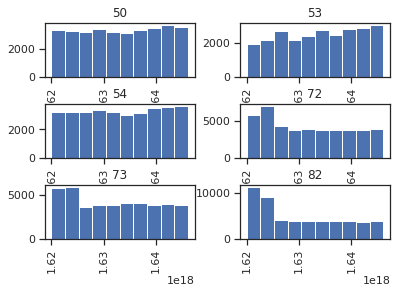

In [25]:
df['timestamp'].hist(by=df['station_id'])

91393


array([[<AxesSubplot:title={'center':'50'}>,
        <AxesSubplot:title={'center':'53'}>],
       [<AxesSubplot:title={'center':'54'}>, <AxesSubplot:>]],
      dtype=object)

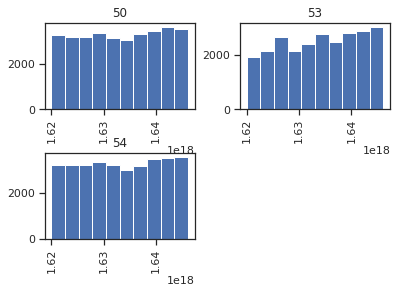

In [26]:
df_c = df[(df.station_id != 73) & (df.station_id != 82) & (df.station_id != 72)]
print(len(df_c))
df_c['timestamp'].hist(by=df_c['station_id'])


In [38]:
df_c.to_csv("fff.csv")

/tmp/ipykernel_6392/1147228659.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


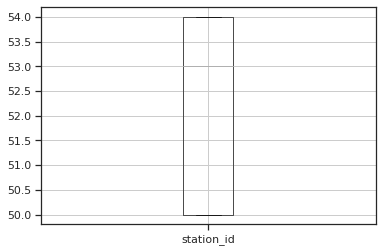

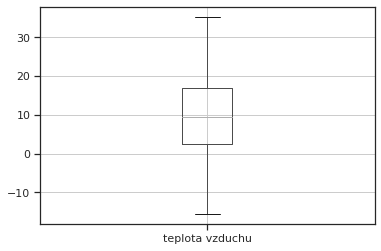

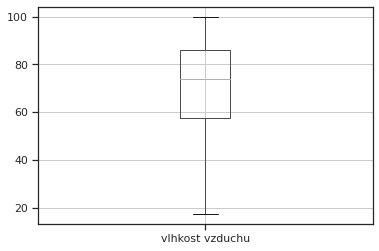

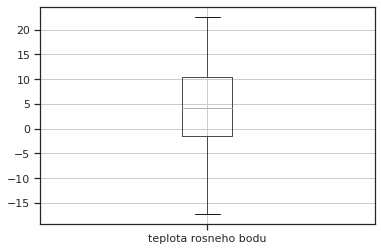

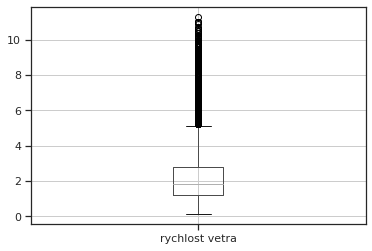

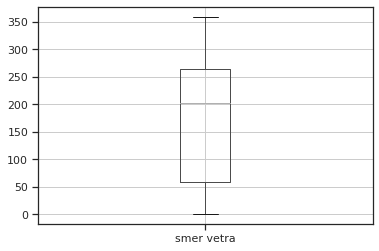

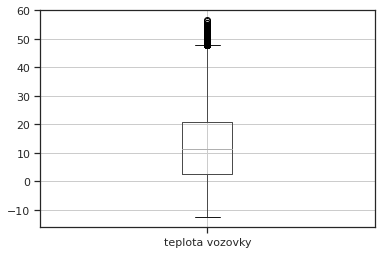

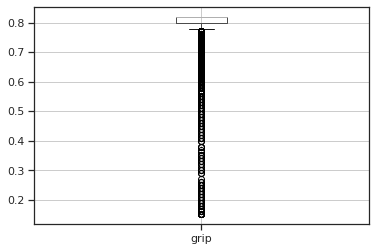

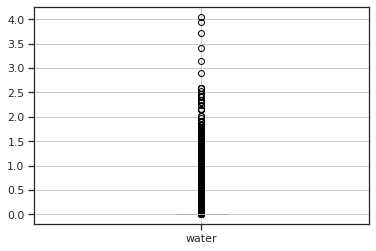

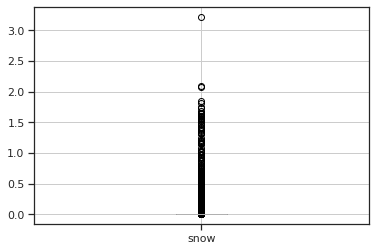

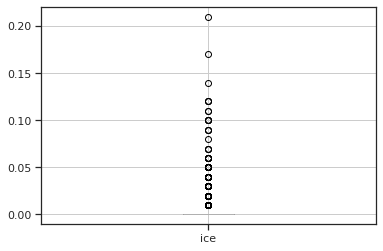

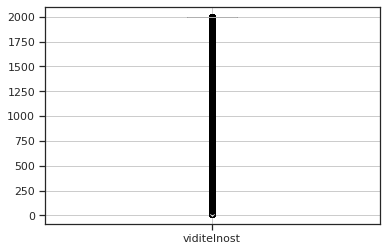

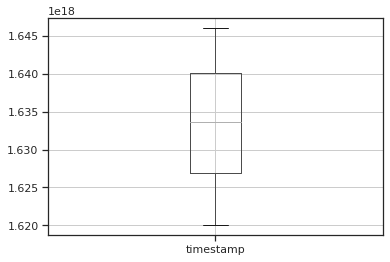

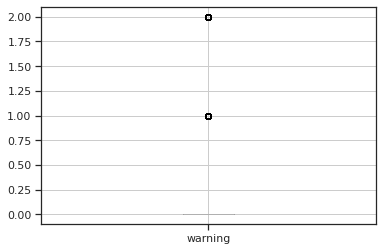

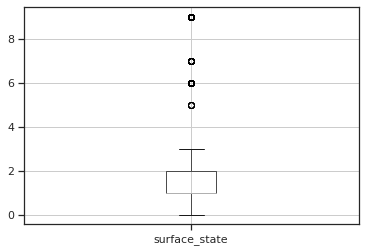

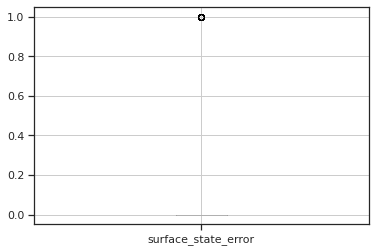

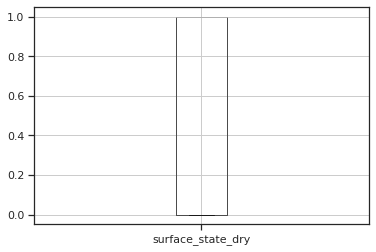

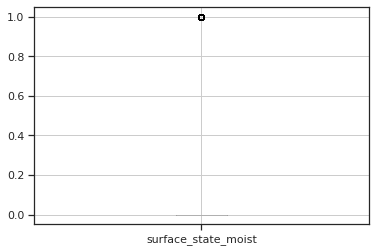

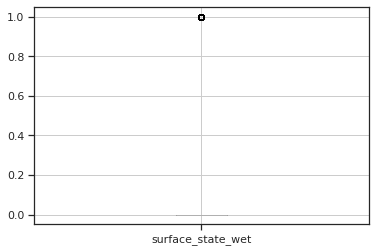

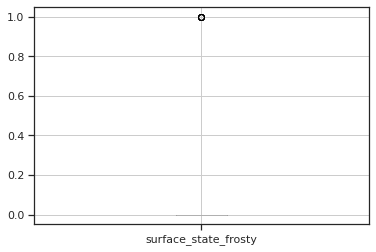

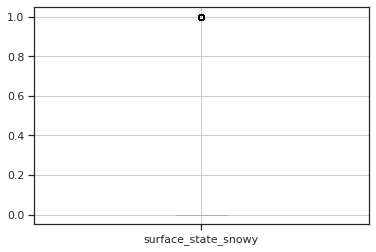

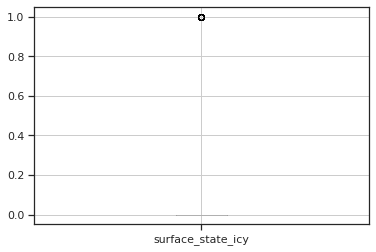

In [27]:
# df.boxplot(column=["temp"])
# df.boxplot()
for column in df_c:
    if column != "mes_datetime":
        plt.figure()
        df_c.boxplot([column])

<AxesSubplot:>

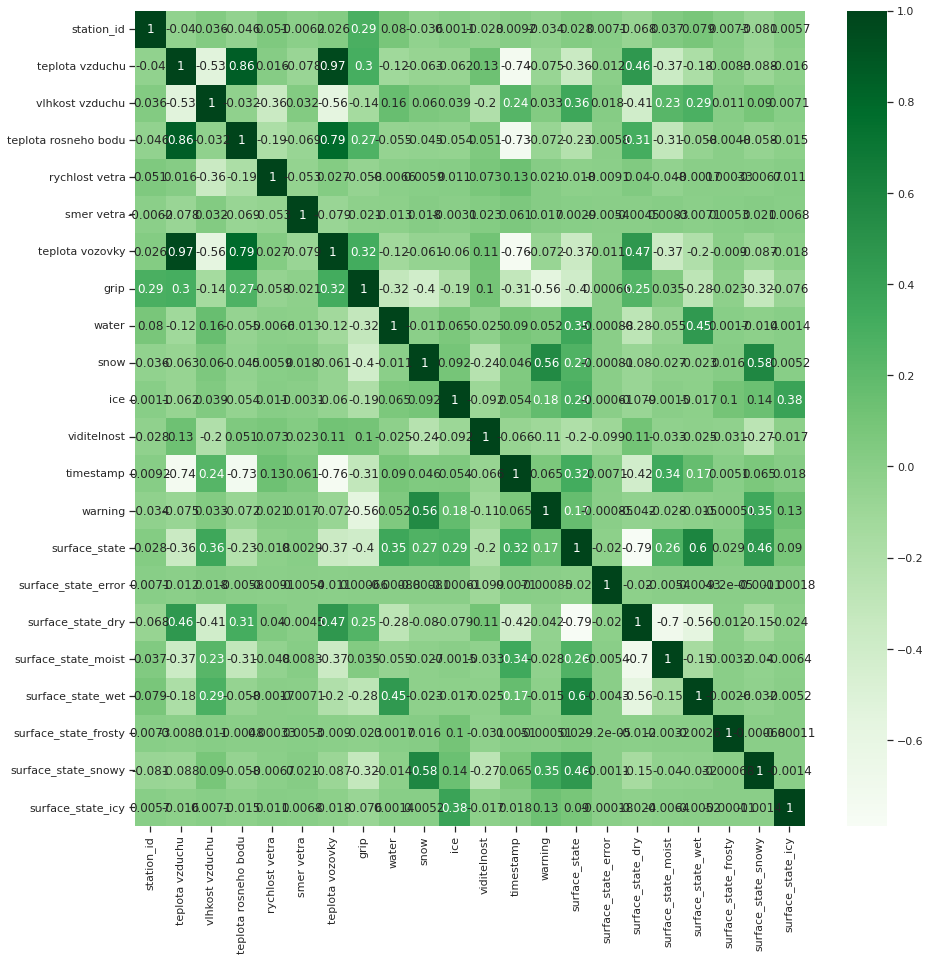

In [28]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df_c.corr(),cmap="Greens",annot=True,ax=ax)
# sns.heatmap(df_lim_vis.corr(),annot=True,ax=ax)

1    65748
2    14561
3     9976
6      768
9      301
7       20
0       14
5        5
Name: surface_state, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


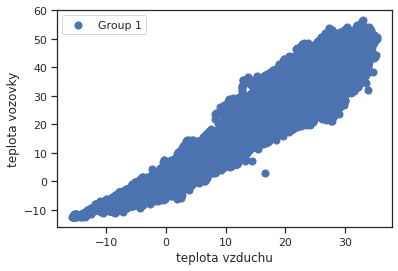

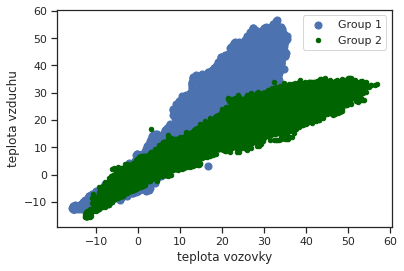

In [35]:
df_c.plot.scatter(x="teplota vzduchu", y="teplota vozovky", s=50, label="Group 1")
ax = df_c.plot.scatter(x="teplota vzduchu", y="teplota vozovky", s=50, label="Group 1")

df_c.plot.scatter(x="teplota vozovky", y="teplota vzduchu", color="DarkGreen", label="Group 2", ax=ax);

<AxesSubplot:>

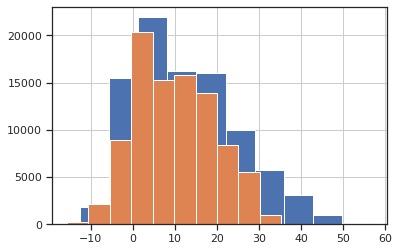

In [37]:
df_c['teplota vozovky'].hist()
df_c['teplota vzduchu'].hist()

In [ ]:
df_c["surface_state_snowy"].value_counts()

In [ ]:
# df_lim_vis.plot.scatter()
# fig,ax=plt.subplots(figsize=(20,20))
# pd.plotting.scatter_matrix(df_clean.drop(columns=['mes_datetime']), ax=ax)

sns.set_theme(style="ticks")

# df = sns.load_dataset("penguins")
df_temp = df_c.drop(columns=["Unnamed: 0","vc_id", "st1","rain",'surface_state','surface_state_error',"surface_state_9"])
sns.pairplot(df_temp)
